In [ ]:
pip install kaggle

In [ ]:
mkdir -p ~/.kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 161M/163M [00:06<00:00, 30.3MB/s]
100% 163M/163M [00:06<00:00, 27.7MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files=os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_956.jpg', 'with_mask_798.jpg', 'with_mask_182.jpg', 'with_mask_2859.jpg', 'with_mask_2269.jpg']
['with_mask_828.jpg', 'with_mask_594.jpg', 'with_mask_420.jpg', 'with_mask_1812.jpg', 'with_mask_2914.jpg']


In [ ]:
without_mask_files=os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_703.jpg', 'without_mask_3241.jpg', 'without_mask_2829.jpg', 'without_mask_3092.jpg', 'without_mask_1743.jpg']
['without_mask_3457.jpg', 'without_mask_1932.jpg', 'without_mask_3027.jpg', 'without_mask_2603.jpg', 'without_mask_106.jpg']


In [ ]:
print("Number of mask images: ",len(with_mask_files))
print("Number of without mask images: ",len(without_mask_files))

Number of mask images:  3725
Number of without mask images:  3828


In [ ]:
with_mask_lables = [1]*3725
without_mask_lables = [0]*3828

with mask --> 1
without mask --> 0


In [ ]:
print(with_mask_lables[0:5])
print(without_mask_lables[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_lables))
print(len(without_mask_lables))

3725
3828


In [ ]:
lables = with_mask_lables + without_mask_lables

print(len(lables))

7553


In [ ]:
print(lables[0:5])

[1, 1, 1, 1, 1]


In [ ]:
print(lables[-5:])

[0, 0, 0, 0, 0]


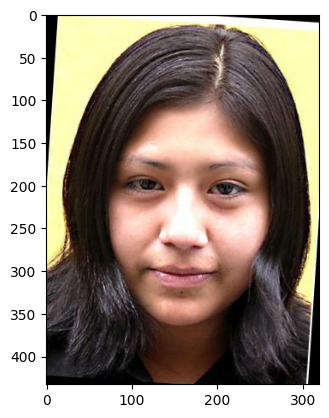

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_1177.jpg')
imgplot = plt.imshow(img)
plt.show()

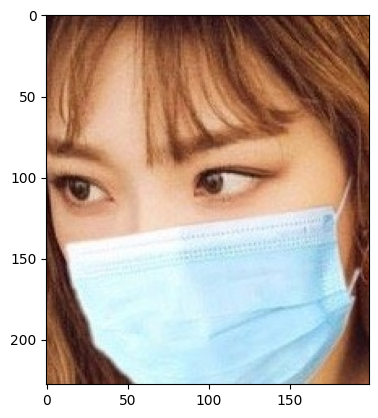

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1177.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing

1)Resize the image
2)convert the images into numpy arrays

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for file_path in with_mask_files:

  image = Image.open(with_mask_path + file_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for file_path in without_mask_files:

  image = Image.open(without_mask_path + file_path)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[204, 209, 213],
        [206, 210, 216],
        [205, 208, 218],
        ...,
        [ 53,  53,  61],
        [ 55,  55,  63],
        [ 56,  56,  64]],

       [[205, 208, 213],
        [205, 207, 215],
        [206, 207, 217],
        ...,
        [ 53,  53,  61],
        [ 56,  56,  64],
        [ 56,  56,  64]],

       [[205, 209, 213],
        [205, 207, 214],
        [207, 207, 217],
        ...,
        [ 53,  53,  63],
        [ 55,  55,  65],
        [ 56,  56,  66]],

       ...,

       [[220, 224, 233],
        [220, 224, 233],
        [220, 224, 233],
        ...,
        [234, 216, 202],
        [236, 218, 204],
        [237, 219, 205]],

       [[220, 224, 233],
        [220, 224, 233],
        [220, 224, 233],
        ...,
        [234, 216, 202],
        [236, 218, 204],
        [237, 219, 205]],

       [[221, 224, 233],
        [221, 224, 233],
        [221, 224, 233],
        ...,
        [234, 216, 202],
        [236, 218, 204],
        [237, 219, 205]]], dtype=uint8)
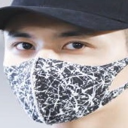

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
x = np.array(data)
y = np.array(lables)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(y)

[1 1 1 ... 0 0 0]


train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled[0])

[[[0.29019608 0.30588235 0.44313725]
  [0.29019608 0.30588235 0.44313725]
  [0.29019608 0.30588235 0.44313725]
  ...
  [0.25490196 0.2745098  0.36078431]
  [0.28627451 0.30588235 0.39215686]
  [0.30588235 0.3254902  0.41176471]]

 [[0.29411765 0.30980392 0.45098039]
  [0.29411765 0.30980392 0.45098039]
  [0.29411765 0.30980392 0.44705882]
  ...
  [0.23137255 0.25098039 0.3372549 ]
  [0.25882353 0.27843137 0.36862745]
  [0.27843137 0.29803922 0.38431373]]

 [[0.29411765 0.31372549 0.44705882]
  [0.29803922 0.31372549 0.44705882]
  [0.29803922 0.31764706 0.45098039]
  ...
  [0.17254902 0.19215686 0.2745098 ]
  [0.19607843 0.21176471 0.29803922]
  [0.20784314 0.22352941 0.30980392]]

 ...

 [[0.89411765 0.88627451 0.94509804]
  [0.89411765 0.89019608 0.94509804]
  [0.89803922 0.89019608 0.94901961]
  ...
  [0.57647059 0.49411765 0.54509804]
  [0.6627451  0.56862745 0.60392157]
  [0.70588235 0.60784314 0.63529412]]

 [[0.9254902  0.91764706 0.96862745]
  [0.91372549 0.90980392 0.95686275]


Bulding CNN


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#training

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
170/170 [==============================] - 130s 753ms/step - loss: 0.4460 - acc: 0.8207 - val_loss: 0.2379 - val_acc: 0.8826
Epoch 2/20
170/170 [==============================] - 129s 759ms/step - loss: 0.2770 - acc: 0.8904 - val_loss: 0.2262 - val_acc: 0.9058
Epoch 3/20
170/170 [==============================] - 126s 741ms/step - loss: 0.2245 - acc: 0.9113 - val_loss: 0.1878 - val_acc: 0.9107
Epoch 4/20
170/170 [==============================] - 127s 749ms/step - loss: 0.1957 - acc: 0.9253 - val_loss: 0.1891 - val_acc: 0.9157
Epoch 5/20
170/170 [==============================] - 128s 754ms/step - loss: 0.1674 - acc: 0.9345 - val_loss: 0.1640 - val_acc: 0.9322
Epoch 6/20
170/170 [==============================] - 128s 752ms/step - loss: 0.1409 - acc: 0.9399 - val_loss: 0.3198 - val_acc: 0.8959
Epoch 7/20
170/170 [==============================] - 127s 746ms/step - loss: 0.1328 - acc: 0.9505 - val_loss: 0.1896 - val_acc: 0.9372
Epoch 8/20
170/170 [============================

Model evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 12s 258ms/step - loss: 0.3056 - acc: 0.9477
Test Accuracy = 0.9477167725563049


In [ ]:
h = history

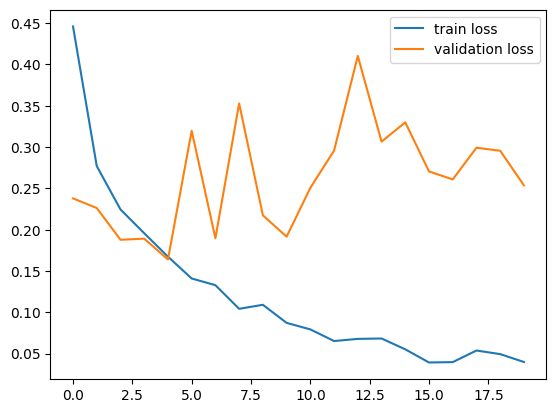

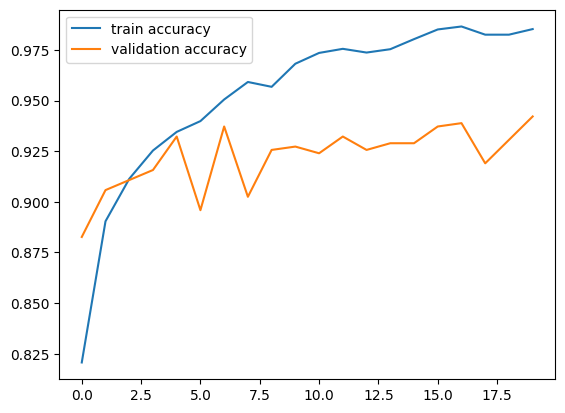

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted : /content/face-mask-3.jpg


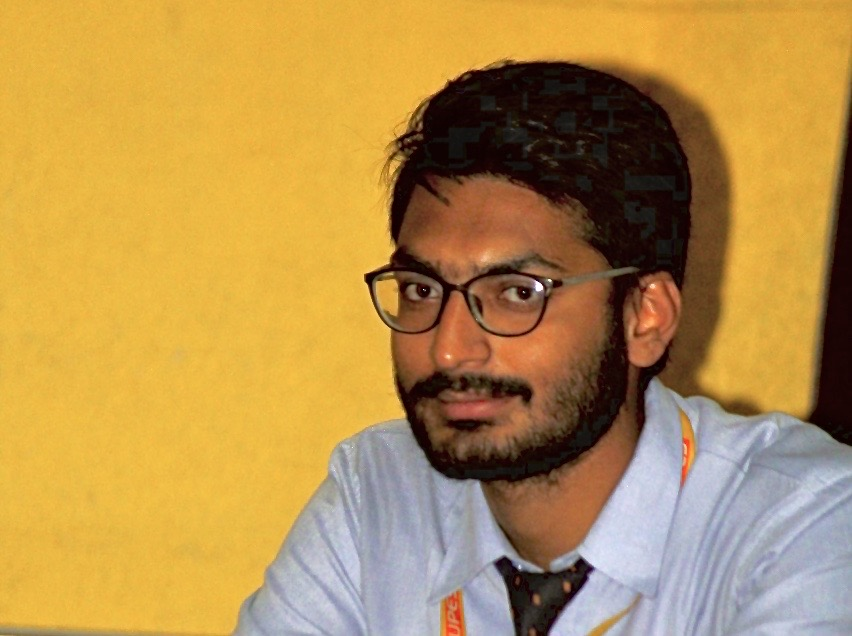

1/1 [==============================] - 0s 40ms/step
[[0.19590278 0.8329194 ]]
1
Without mask


In [ ]:
#predictive system

input_image_path = input("Path of the image to be predicted : ")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if(input_pred_label==0):
  print("With mask")
else:
  print("Without mask")

Path of the image to be predicted: /content/mask.jpeg


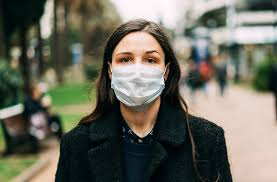

1/1 [==============================] - 0s 31ms/step
[[0.8027201  0.09597649]]
0
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')